<a href="https://colab.research.google.com/github/Ishi-ka117/Credit-_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection_Ishika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd

In [4]:
path="/content/drive/MyDrive/credit card dataset/creditcard_2023.csv"
csv=pd.read_csv(path)
csv

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [5]:
csv.head()  #first 5 rows display

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
csv.tail()   #last 5 rows display

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [7]:
csv.shape

(568630, 31)

In [8]:
print("No of Rows:",csv.shape[0])
print("NO of columns:",csv.shape[1])

No of Rows: 568630
NO of columns: 31


In [9]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [10]:
csv['id'] = csv['id'].astype(float)
print(csv.dtypes)
#to convert the 'id' column to the float data type

id        float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [11]:
missing_values=csv .isnull().sum()
print(missing_values)

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [12]:
csv['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [13]:
csv.describe()   #giving full overview of dataset,, if the mean and median are close, the data is likely symmetric.

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [14]:
csv.groupby('Class').mean()
#to aggregate or cluster the dataset

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


In [15]:
legit=csv[csv.Class==0]
fraud=csv[csv.Class==1]
print(legit.shape)
print(fraud.shape)


(284315, 31)
(284315, 31)


In [16]:
legit.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.109640,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506,0.0
std,82209.499698,0.823780,0.699694,0.703000,0.670814,0.659360,0.724878,0.680147,0.234341,0.737617,...,0.283103,0.665628,0.628250,1.129375,0.840462,1.083032,0.510286,0.791552,6929.500715,0.0
min,0.000000,-3.495584,-49.966572,-3.183760,-4.951222,-9.952786,-21.111108,-3.470512,-10.756342,-1.916317,...,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-8.226969,-10.498633,-39.035243,50.120000,0.0
25%,71255.500000,-0.137680,-0.659950,0.149456,-1.082322,0.014171,0.016251,0.261605,-0.199056,0.144401,...,-0.196060,-0.523588,-0.185732,-0.602451,-0.589134,-0.781780,-0.317491,-0.228248,6034.540000,0.0
50%,142427.000000,0.212300,-0.422918,0.566170,-0.636818,0.232901,0.316757,0.447237,-0.147484,0.465011,...,-0.115185,-0.036867,-0.035066,0.115801,-0.057297,-0.106251,-0.236418,-0.073035,11996.900000,0.0
75%,213633.500000,1.089764,-0.188602,1.105280,-0.314858,0.518734,0.698831,0.649758,-0.077200,0.889695,...,-0.029475,0.460693,0.127059,0.933859,0.496666,0.542481,-0.132531,0.088282,18040.265000,0.0
max,284806.000000,2.229046,3.781692,14.125834,3.201536,42.716891,26.168402,217.873038,5.517577,20.270062,...,6.834415,12.632511,31.707627,12.965639,14.621509,5.623285,113.231093,77.255937,24039.930000,0.0


In [17]:
fraud.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.109640,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763,1.0
std,82925.309386,0.899890,1.013186,0.758476,0.683137,1.155811,1.046878,1.027026,1.379656,0.877642,...,1.376887,1.247617,1.266925,0.831062,1.134011,0.903854,1.283753,1.163028,6909.750891,0.0
min,541.000000,-2.637662,-4.354871,-2.518308,-1.369576,-3.301638,-3.992872,-4.351839,-6.535574,-3.751919,...,-12.170779,-6.450353,-14.452018,-3.061862,-6.810179,-3.142725,-4.947034,-4.681207,50.010000,1.0
25%,355393.500000,-0.987457,-0.059755,-1.058440,0.223155,-0.895840,-1.055736,-0.998959,-0.171901,-1.128155,...,-0.056038,-0.458915,-0.313041,-0.690113,-0.506577,-0.520578,-0.247487,-0.255928,6074.640000,1.0
50%,426472.000000,-0.466978,0.315891,-0.642064,0.682550,-0.217567,-0.344515,-0.269964,-0.018501,-0.524025,...,0.123284,-0.017395,-0.090979,-0.118808,0.027397,0.057893,0.267966,0.241339,12062.450000,1.0
75%,497550.500000,0.020336,0.855481,-0.195426,1.216940,0.282330,0.204656,0.151652,0.259378,0.010938,...,0.358277,0.466587,0.215736,0.438727,0.606451,0.732728,0.745973,0.744542,18033.780000,1.0
max,568629.000000,1.874323,4.361865,2.193790,2.394164,9.240845,3.531564,3.849367,5.958040,3.325877,...,8.087080,9.770936,6.557122,2.443924,3.838035,4.622883,4.834397,4.148860,24039.930000,1.0


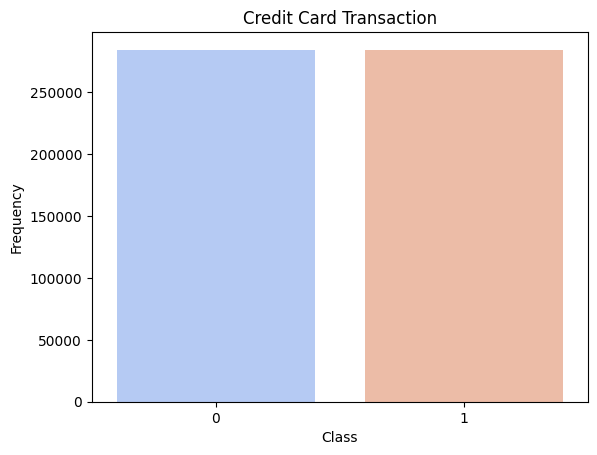

In [52]:
#data analysis of legit and fraud cases

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=csv, x='Class',palette="coolwarm")
plt.title('Credit Card Transaction')
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.show()

In [19]:
corr =csv.corr()
corr

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,-0.395741,0.424267,-0.663655,0.617554,-0.268445,-0.387916,-0.414288,0.121282,-0.508427,...,0.097948,0.036106,0.017594,-0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,-0.395741,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,0.424267,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,-0.663655,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,0.617554,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,-0.268445,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,-0.387916,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,-0.414288,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,0.121282,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,-0.508427,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522


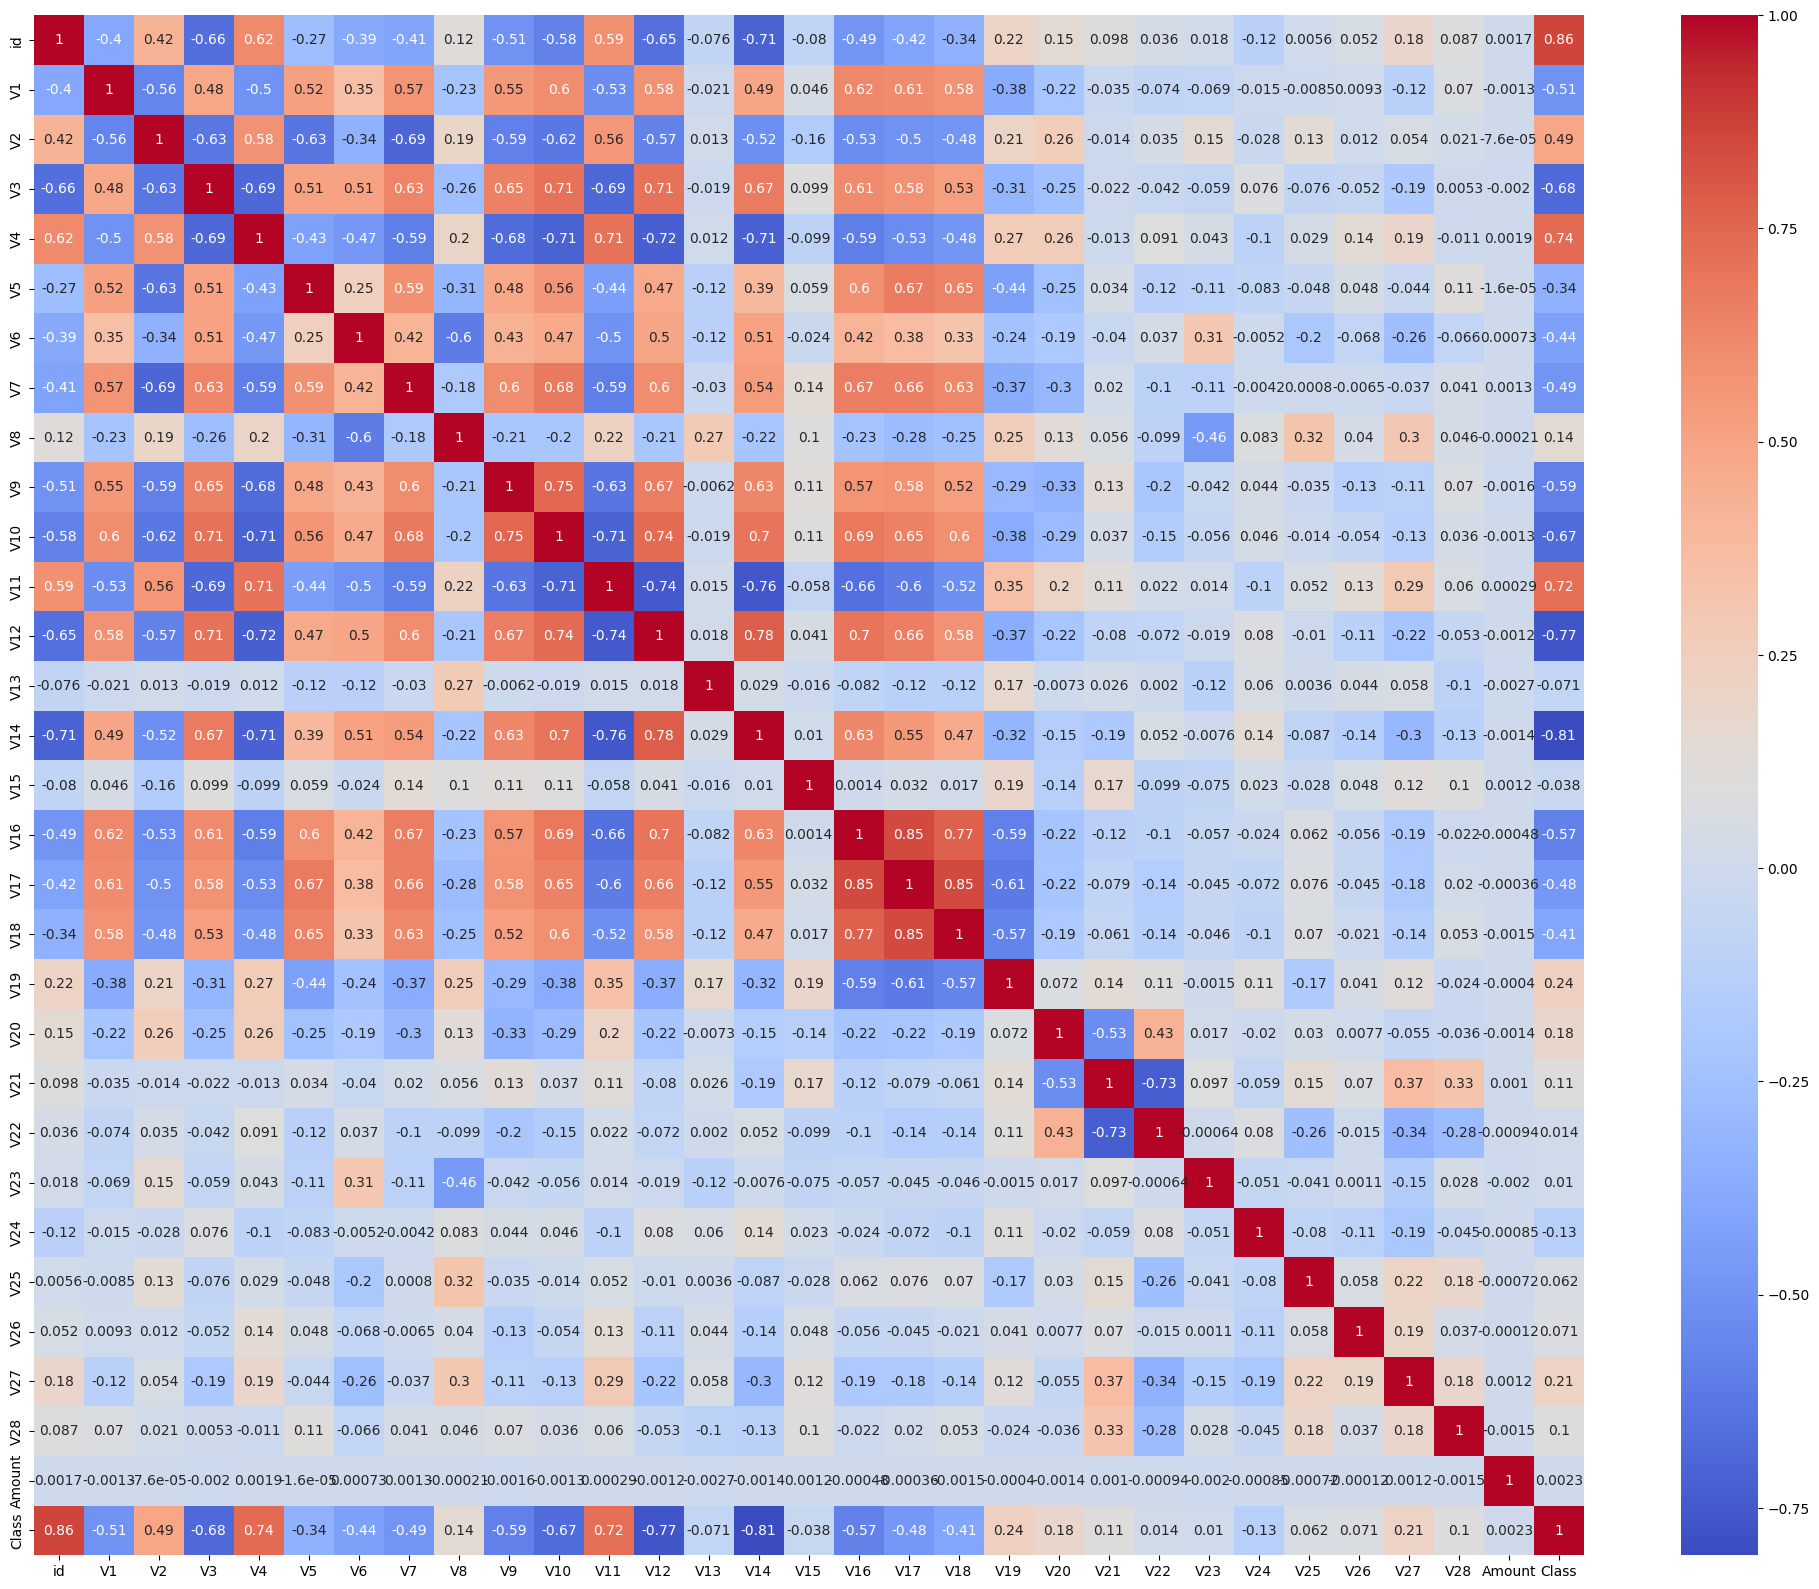

In [20]:
plt.figure(figsize=(25,20))
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

In [21]:
X=csv.drop(['Class'],axis=1)
Y=csv['Class']
#X is a feature matrix, which includes all columns except for the 'Class' column.
#Y is a target variable, which is the 'Class' column.
#Here,axis=1 indicates column

In [22]:
print(legit)
print(fraud)


              id        V1        V2        V3        V4        V5        V6  \
0            0.0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1.0  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2.0 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3.0 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4.0 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...          ...       ...       ...       ...       ...       ...       ...   
284802  284802.0 -1.605484  2.041786 -1.198693 -1.883651 -1.054493 -1.199907   
284803  284803.0 -0.080325 -0.463534  1.977771 -1.016889  0.643741  1.046862   
284804  284804.0  1.653848 -0.550318 -0.382720 -0.914126  1.676939  2.007193   
284805  284805.0  0.097216 -0.271727  0.875060 -0.333300  0.116064  0.819487   
284806  284806.0 -0.013366 -0.510551  0.875610 -0.885602  0.248619  0.088888   

              V7        V8        V9  .

In [23]:
cols=list(X.columns.values)

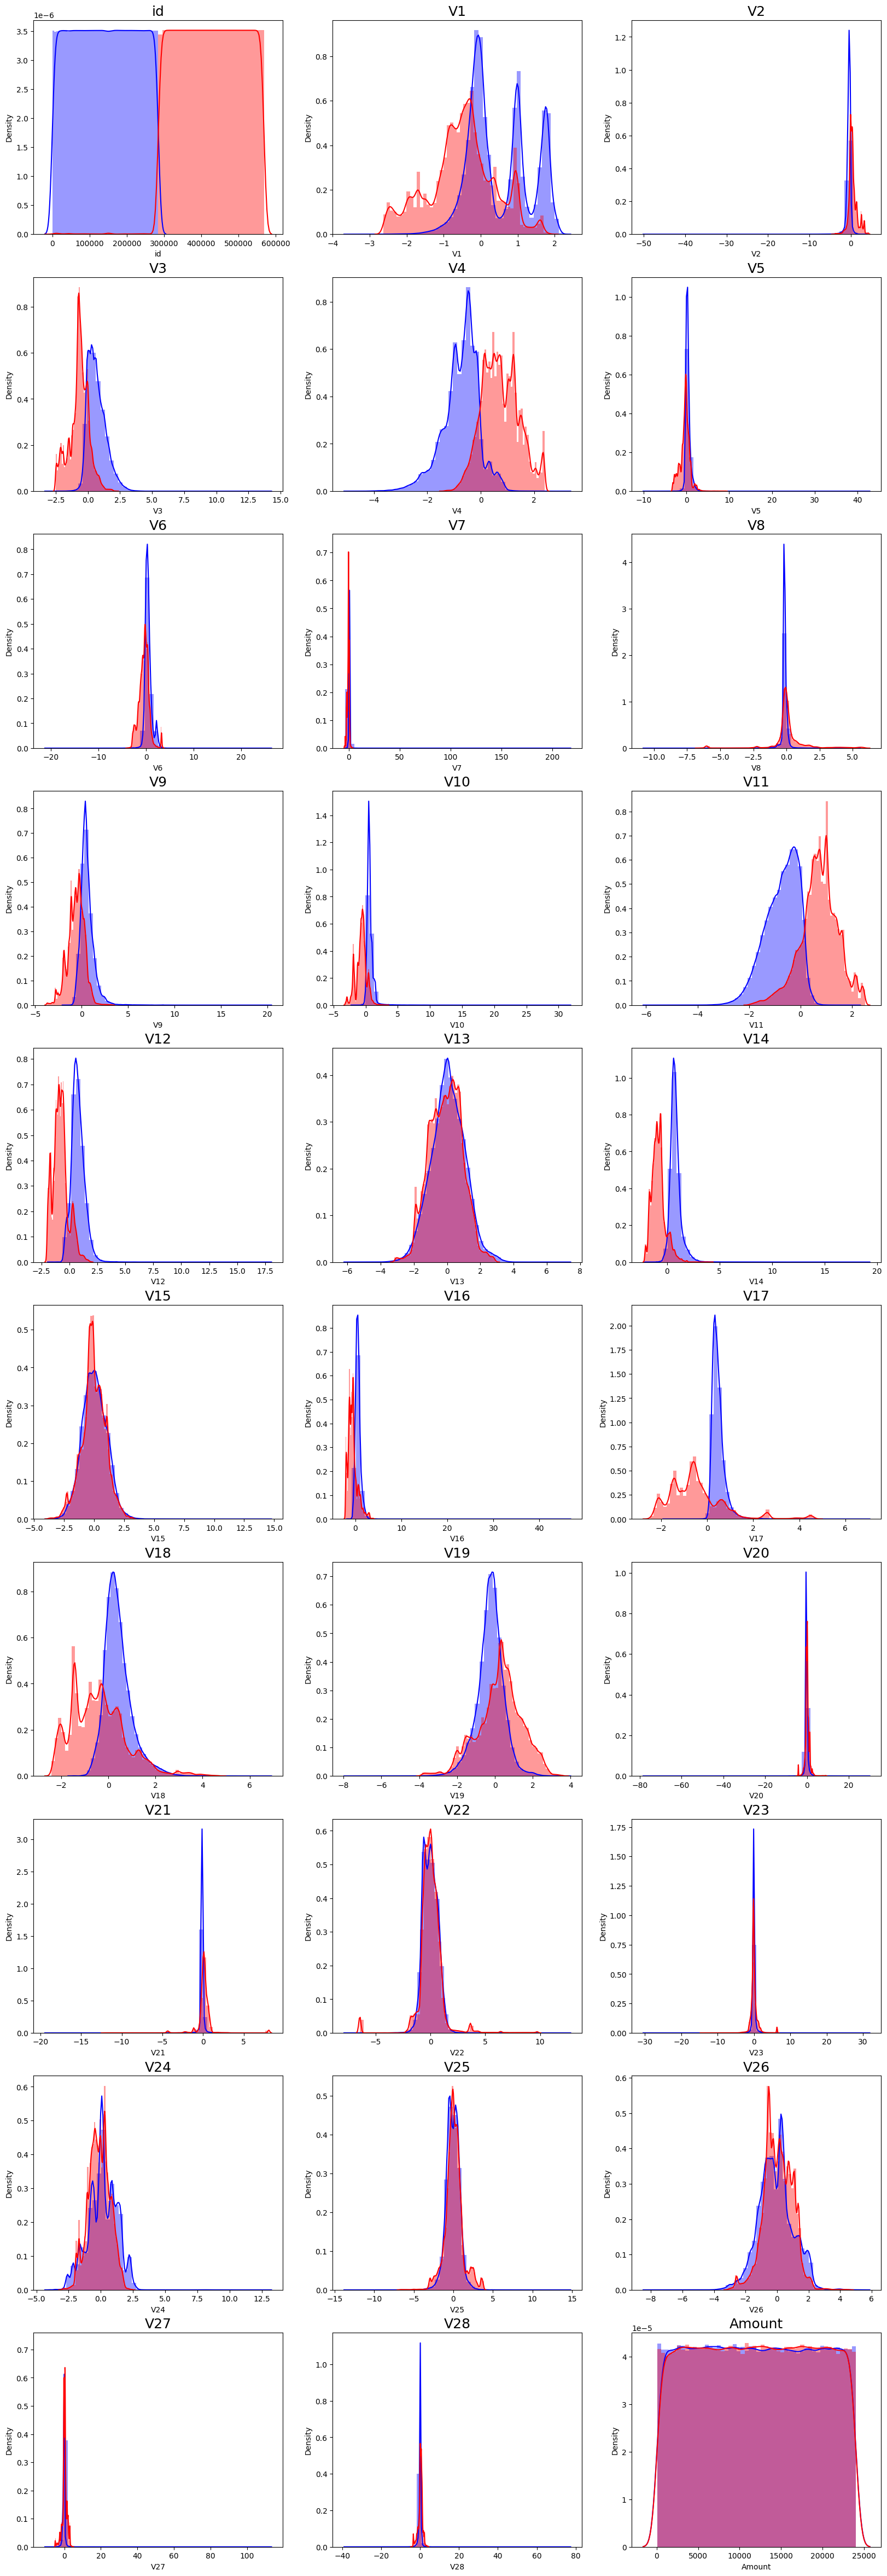

In [49]:
import warnings
warnings.filterwarnings("ignore")

legit=csv.Class==0
fraud=csv.Class==1

plt.figure(figsize=(20,60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][legit],color='blue')
  sns.distplot(X[col][fraud],color='red')
  plt.title(col,fontsize=18)
plt.show()

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((454904, 30), (454904,), (113726, 30), (113726,))

In [27]:
Y_test

437378    1
504222    1
4794      0
388411    1
424512    1
         ..
172633    0
183013    0
484066    1
426713    1
272068    0
Name: Class, Length: 113726, dtype: int64

In [28]:
model=LogisticRegression()

In [29]:
model.fit(X_train,Y_train)

LogisticRegression()

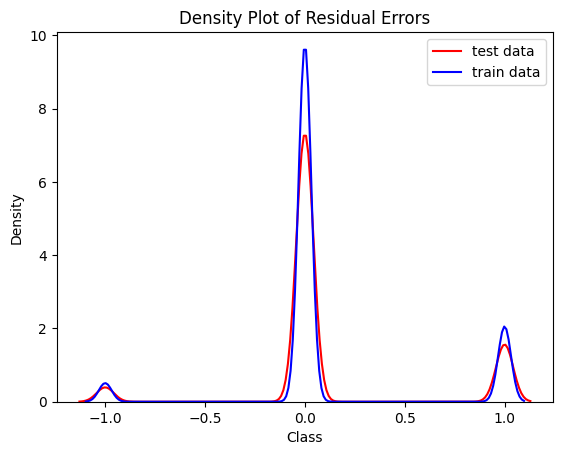

In [30]:
sns.kdeplot(model.predict(X_test) - Y_test, color='r', label='test data')
sns.kdeplot(model.predict(X_train) - Y_train, color='b', label='train data')
plt.title('Density Plot of Residual Errors')
plt.legend()
plt.show()


In [31]:
Y_pred1=model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,Y_pred1)
accuracy

0.7893533580711535

In [33]:
from sklearn.metrics import precision_score

precision = precision_score(Y_test, Y_pred1)
precision


0.7314659039928219

In [34]:
from sklearn.metrics import recall_score
recall=recall_score(Y_test,Y_pred1)
recall

0.915718899185622

In [35]:
from sklearn.metrics import f1_score
f1score=f1_score(Y_test,Y_pred1)
f1score

0.8132871929168225

In [36]:
Y_pred2=model.predict(X_train)

In [37]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_train,Y_pred2)
accuracy

0.791692313103424

In [38]:
from sklearn.metrics import precision_score

precision = precision_score(Y_train, Y_pred2)
precision

0.7330026959483447

In [39]:
from sklearn.metrics import recall_score
recall=recall_score(Y_train,Y_pred2)
recall

0.9173085128376566

In [40]:
from sklearn.metrics import f1_score
f1score=f1_score(Y_train,Y_pred2)
f1score

0.814864020006252

In [41]:
pd.DataFrame({'Data_Set':['Test','Train'],'Accuracy':[accuracy_score(Y_test, Y_pred1)*100,accuracy_score(Y_train, Y_pred2)*100]})

,Data_Set,Accuracy
0,Test,78.935336
1,Train,79.169231


from matplotlib import pyplot as plt
_df_0['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Data_Set').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Accuracy'}, axis=1)
              .sort_values('Accuracy', ascending=True))
  xs = counted['Accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Accuracy', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Data_Set')):
  _plot_series(series, series_name, i)
  fig.legend(title='Data_Set', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['Data_Set'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='Accuracy', y='Data_Set', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [42]:
pd.DataFrame({'Data_Set':['Test','Train'],'Precision':[precision_score(Y_test, Y_pred1)*100,precision_score(Y_train, Y_pred2)*100]})

,Data_Set,Precision
0,Test,73.14659
1,Train,73.30027


from matplotlib import pyplot as plt
_df_5['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Data_Set').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Precision']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Precision'}, axis=1)
              .sort_values('Precision', ascending=True))
  xs = counted['Precision']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Precision', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Data_Set')):
  _plot_series(series, series_name, i)
  fig.legend(title='Data_Set', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Precision')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Data_Set'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Precision', y='Data_Set', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [43]:
pd.DataFrame({'Data_Set':['Test','Train'],'Recall':[recall_score(Y_test, Y_pred1)*100,recall_score(Y_train, Y_pred2)*100]})

,Data_Set,Recall
0,Test,91.571890
1,Train,91.730851


from matplotlib import pyplot as plt
_df_10['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('Data_Set').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Recall']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Recall'}, axis=1)
              .sort_values('Recall', ascending=True))
  xs = counted['Recall']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Recall', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Data_Set')):
  _plot_series(series, series_name, i)
  fig.legend(title='Data_Set', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Recall')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_13['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Data_Set'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Recall', y='Data_Set', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [44]:
pd.DataFrame({'Data_Set':['Test','Train'],'F1':[f1_score(Y_test, Y_pred1)*100,f1_score(Y_train, Y_pred2)*100]})

,Data_Set,F1
0,Test,81.328719
1,Train,81.486402


from matplotlib import pyplot as plt
_df_15['F1'].plot(kind='hist', bins=20, title='F1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('Data_Set').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['F1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'F1'}, axis=1)
              .sort_values('F1', ascending=True))
  xs = counted['F1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('F1', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Data_Set')):
  _plot_series(series, series_name, i)
  fig.legend(title='Data_Set', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('F1')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_18['F1'].plot(kind='line', figsize=(8, 4), title='F1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Data_Set'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='F1', y='Data_Set', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)